Athul Mathew     CB.EN,P2AID20016  

## Task 1

## Task 2

Accept file from user and display the image on screen and write this one on to a new file if usr request(copying)

Display stat of the file : noof rows, cols, size of file...etc from your dataset.

In [6]:
import matplotlib.pyplot as plt

from PIL import Image
import shutil

import os

In [7]:
class ImageHandling:
    
    def __init__(self):
        pass
        
    def get_image(self, show = False):
        print("Current working directory:", os.getcwd())
        print(os.listdir())
        self.file_name = input("Enter the Image name/Path including extention : ")
        if show:
            self.display_img()

    def display_img(self):
        im = Image.open(self.file_name)
        plt.imshow(im)

    def copy_image(self):
        source = input("Enter the Source Path")
        dest = input("Enter the Destination Path")
        shutil.copyfile(source, dest)
        return True

    def display_stats(self):
        im = Image.open(self.file_name)
        self.width, self.height = im.size
        print("Image Height is", self.height)
        print("Image Width is", self.width)
        
        print("Image Format is", im.format)  
        print("Image Mode is", im.mode)

        # get image resolution
        # get image meta data


Current working directory: C:\Users\athul\3. Computer Vision
['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 1.jpg


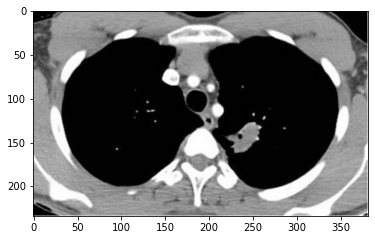

In [8]:
# Read image from user
ih = ImageHandling()
ih.get_image(show = True)

In [9]:
ih.get_image(show = False)

Current working directory: C:\Users\athul\3. Computer Vision
['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 1.jpg


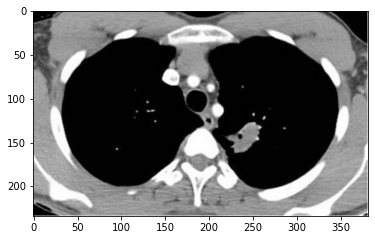

In [10]:
ih.display_img()

In [11]:
ih.display_stats()

Image Height is 234
Image Width is 382
Image Format is JPEG
Image Mode is RGB


## Task 3 : Interpolation

Based on user choice perform interpolation(code from scratch) 
1. Zeroth order
2. First order
3. Bi-linear
4. Bi-Cubic

In [12]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from prettytable import PrettyTable

class Interpolation:
    
    def __init__(self):
        pass
    
    def get_image(self, show = False):
        print("Current working directory:", os.getcwd())
        print("Files in CWD: ", os.listdir())
        self.file_name = input("Enter the Image name/Path including extention : ")
        if show:
            self.display_img()
            
    def display_img(self):
        self.im = Image.open(self.file_name)
        plt.imshow(self.im)
        
    def display_stats(self):
        img = Image.open(self.file_name)
        self.im = img.convert("RGB")
        self.width, self.height = self.im.size
        print("Image Height is", self.height)
        print("Image Width is", self.width)
        
        print("Image Format is", self.im.format)  
        print("Image Mode is", self.im.mode)
    
    def get_user_input(self):
        
        self.get_image(show = False)
        self.display_stats()
        
        t = PrettyTable(['Interpolation Method', 'Option'])
        t.add_row(['Zeroth Order', 1])
        t.add_row(['First Order', 2])
        t.add_row(['Bi-Linear', 3])
        t.add_row(['Bi-Cubic', 4])
        print(t)
        
        option = int(input("Enter the Option : "))
        
        if option == 1:
            self.zeroth_order()
        elif option == 2:
            self.first_order()
        elif option == 3:
            self.bi_linear()
        else:
            self.bi_cubic()
        
    
    def zeroth_order(self):
        print("ZEROTH ORDER INTERPOLATION")
        data = np.asarray(self.im)
        
        a = np.zeros((2*self.im.size[1], 2*self.im.size[0], 3))

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):
                    a[2*i,2*j,k] = column
                    a[2*i+1,2*j,k] = column
                    a[2*i+1,2*j+1,k] = column
                    a[2*i,2*j+1,k] = column
                    
        self.dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
        plt.imshow(self.dt)
    
    def first_order(self):
        print("FIRST ORDER INTERPOLATION")
        data = np.asarray(self.im)
        
        a = np.zeros((2*self.im.size[1]+1, 2*self.im.size[0]+1, 3))

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i,2*j,k] = column

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k])/2
                    a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k])/2
                    a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k])/2
        
        self.dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
        plt.imshow(self.dt)
        
    
    def bi_linear(self):
        print("BI-LINEAR INTERPOLATION")
        data = np.asarray(self.im)
        
        a = np.zeros((2*self.im.size[1]+1, 2*self.im.size[0]+1, 3))

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i,2*j,k] = column

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k]+
                                      a[2*i+1,2*j-1,k]+a[2*i+1,2*j+1,k])/4
                    
                    a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k]+
                                        a[2*i+1,2*j,k]+a[2*i+1,2*j+2,k])/4
                    
                    a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k]+
                                      a[2*i,2*j,k]+a[2*i,2*j+2,k])/4
    
        self.dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
        plt.imshow(self.dt)
        
    def bi_cubic(self):
        print("BI-CUBIC INTERPOLATION")
        data = np.asarray(self.im)
        
        a = np.zeros((2*self.im.size[1]+1, 2*self.im.size[0]+1, 3))

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i,2*j,k] = column

        for i,channel in enumerate(data):
            for j,row in enumerate(channel):
                for k,column in enumerate(row):

                    a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k]+
                                      a[2*i+1,2*j-1,k]+a[2*i+1,2*j+1,k]+
                                      a[2*i,2*j,k]+a[2*i+2,2*j,k])/8

                    a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k]+
                                        a[2*i+1,2*j,k]+a[2*i+1,2*j+2,k]+
                                           a[2*i+2,2*j+1,k]+a[2*i,2*j+1,k])/8



                    a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k]
                                      +a[2*i,2*j,k]+a[2*i,2*j+2,k]+
                                      a[2*i-1,2*j+1,k]+a[2*i+1,2*j+1,k])/8
                    
        
        self.dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
        plt.imshow(self.dt)
    

Current working directory: C:\Users\athul\3. Computer Vision
Files in CWD:  ['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 1.jpg
Image Height is 234
Image Width is 382
Image Format is None
Image Mode is RGB
+----------------------+--------+
| Interpolation Method | Option |
+----------------------+--------+
|     Zeroth Order     |   1    |
|     First Order      |   2    |
|      Bi-Linear       |   3    |
|       Bi-Cubic       |   4    |
+----------------------+--------+
Enter the Option : 1
ZEROTH ORDER INTERPOLATION


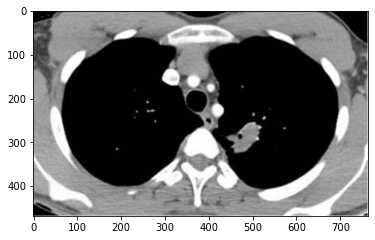

In [13]:
ir = Interpolation()
ir.get_user_input()

Current working directory: C:\Users\athul\3. Computer Vision
Files in CWD:  ['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 1.tif
Image Height is 1860
Image Width is 1059
Image Format is None
Image Mode is RGB
+----------------------+--------+
| Interpolation Method | Option |
+----------------------+--------+
|     Zeroth Order     |   1    |
|     First Order      |   2    |
|      Bi-Linear       |   3    |
|       Bi-Cubic       |   4    |
+----------------------+--------+
Enter the Option : 2
FIRST ORDER INTERPOLATION


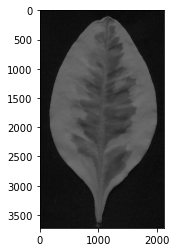

In [14]:
ir = Interpolation()
ir.get_user_input()

Current working directory: C:\Users\athul\3. Computer Vision
Files in CWD:  ['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 12.jpeg
Image Height is 1280
Image Width is 720
Image Format is None
Image Mode is RGB
+----------------------+--------+
| Interpolation Method | Option |
+----------------------+--------+
|     Zeroth Order     |   1    |
|     First Order      |   2    |
|      Bi-Linear       |   3    |
|       Bi-Cubic       |   4    |
+----------------------+--------+
Enter the Option : 3
BI-LINEAR INTERPOLATION


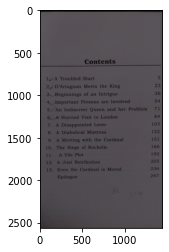

In [15]:
ir = Interpolation()
ir.get_user_input()

Current working directory: C:\Users\athul\3. Computer Vision
Files in CWD:  ['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 7.png
Image Height is 323
Image Width is 442
Image Format is None
Image Mode is RGB
+----------------------+--------+
| Interpolation Method | Option |
+----------------------+--------+
|     Zeroth Order     |   1    |
|     First Order      |   2    |
|      Bi-Linear       |   3    |
|       Bi-Cubic       |   4    |
+----------------------+--------+
Enter the Option : 4
BI-CUBIC INTERPOLATION


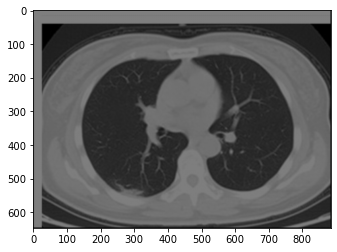

In [16]:
ir = Interpolation()
ir.get_user_input()

### Zero-th order interpolation

In [17]:
import numpy as np

im = Image.open("Face_boy.jpg")
data = np.asarray(im)

a = np.zeros((2*im.size[1], 2*im.size[0], 3))

for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i,2*j,k] = column
            a[2*i+1,2*j,k] = column
            a[2*i+1,2*j+1,k] = column
            a[2*i,2*j+1,k] = column

AxesImage(54,36;334.8x217.44)


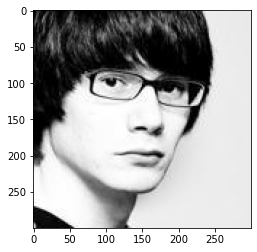

In [18]:
dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
print(plt.imshow(dt))

### First Order Interpolation

In [19]:
import numpy as np

im = Image.open("Face_boy.jpg")
data = np.asarray(im)

a = np.zeros((2*im.size[1]+1, 2*im.size[0]+1, 3))

for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i,2*j,k] = column
            
for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k])/2
            a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k])/2
            a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k])/2

AxesImage(54,36;334.8x217.44)


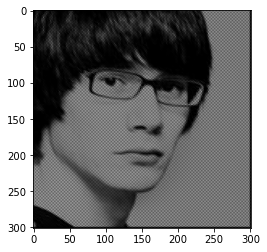

In [20]:
dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
print(plt.imshow(dt))

### Bi-linear Interpolation

In [23]:
import numpy as np

im = Image.open("Face_boy.jpg")
data = np.asarray(im)

a = np.zeros((2*im.size[1]+1, 2*im.size[0]+1, 3))

for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i,2*j,k] = column
            
for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k]+a[2*i+1,2*j-1,k]+a[2*i+1,2*j+1,k])/4
            a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k]+a[2*i+1,2*j,k]+a[2*i+1,2*j+2,k])/4
            a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k]+a[2*i,2*j,k]+a[2*i,2*j+2,k])/4

AxesImage(54,36;334.8x217.44)


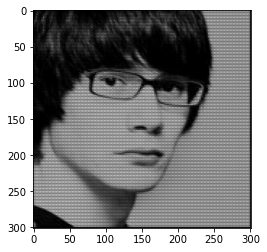

In [24]:
dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
print(plt.imshow(dt))

### Bi-Cubic

In [25]:
import numpy as np

im = Image.open("Face_boy.jpg")
data = np.asarray(im)

a = np.zeros((2*im.size[1]+1, 2*im.size[0]+1, 3))

for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i,2*j,k] = column
            
for i,channel in enumerate(data):
    for j,row in enumerate(channel):
        for k,column in enumerate(row):
            
            a[2*i+1,2*j,k] = (a[2*i,2*j-1,k]+a[2*i+2,2*j+1,k]+
                              a[2*i+1,2*j-1,k]+a[2*i+1,2*j+1,k]+
                              a[2*i,2*j,k]+a[2*i+2,2*j,k])/8
            
            a[2*i+1,2*j+1,k] = (a[2*i,2*j,k]+a[2*i+2,2*j+2,k]+
                                a[2*i+1,2*j,k]+a[2*i+1,2*j+2,k]+
                                   a[2*i+2,2*j+1,k]+a[2*i,2*j+1,k])/8
            
            
            
            a[2*i,2*j+1,k] = (a[2*i-1,2*j,k]+a[2*i+1,2*j+2,k]
                              +a[2*i,2*j,k]+a[2*i,2*j+2,k]+
                              a[2*i-1,2*j+1,k]+a[2*i+1,2*j+1,k])/8

AxesImage(54,36;334.8x217.44)


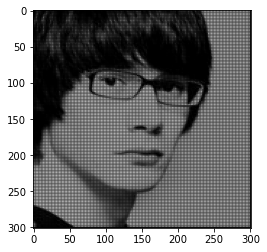

In [26]:
dt = Image.fromarray((a).astype(np.uint8)).convert('RGB')
print(plt.imshow(dt))

### CVPOLATION - Python library

URL : https://pypi.org/project/cvpolation/1.0.1/

In [27]:
!pip install cvpolation --user

Current working directory: C:\Users\athul\3. Computer Vision
Files in CWD:  ['.ipynb_checkpoints', '1.jpg', '1.tif', '12.jpeg', '25-02-2021 Lab Experiment1.ipynb', '7.png', 'Face_boy.jpg', 'ImageDataset']
Enter the Image name/Path including extention : 1.jpg
Image Height is 234
Image Width is 382
Image Format is JPEG
Image Mode is RGB
+----------------------+--------+
| Interpolation Method | Option |
+----------------------+--------+
|     Zeroth Order     |   1    |
|     First Order      |   2    |
|      Bi-Linear       |   3    |
|       Bi-Cubic       |   4    |
+----------------------+--------+
Enter the Option : 3
BI-LINEAR INTERPOLATION


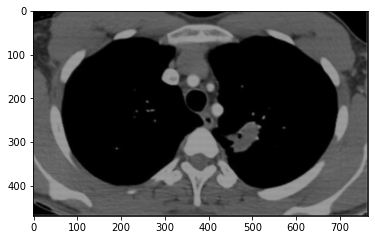

In [28]:
from cvpolation import *

ir = Interpolation()
ir.get_user_input()

### Interpolation using Inbuild libraries

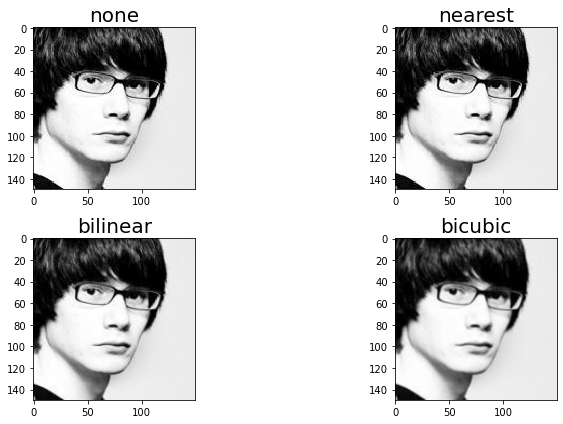

In [35]:
import matplotlib.image as mpimg

im = mpimg.imread("Face_boy.jpg")

methods = ['none', 'nearest', 'bilinear', 'bicubic']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))



for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
    
plt.tight_layout()
plt.show()

